# YOLOv11 Helmet Detection: Training and Prediction

In [3]:
!pip install uv && uv pip install --upgrade pip && uv pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 114.0 MB/s eta 0:00:00
Using Python 3.11.12 environment at: /usr
Resolved 1 package in 72ms
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
⠙ Preparing packages... (0/1)
Prepared 1 package in 85ms
Uninstalled 1 package in 28ms
Installed 1 package in 11ms
 - pip==24.1.2
 + pip==25.0.1
Using Python 3.11.12 environment at: /usr
Resolved 52 packages in 343ms
⠙ Preparing packages... (0/12)
⠙ Preparing packages... (0/12)
nvidia-cuda-cupti-cu12 ------------------------------     0 B/

In [4]:
import os
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import Image, display

print("--- Imports Loaded ---")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
--- Imports Loaded ---


# WARNING

Before loading the yaml, here's a notice in case you got error when training the model:
\
When running model training, please double-check your path and change it in yaml config file if these's any image load error.
\
In most case, `DATA_YAML_PATH` should not be changed. The only problem is in yaml file, relative path is having some problem for YOLO to detect.

## Section 3: Define Configuration and Model

Define paths, model variant, and load the base model and dataset configuration.

In [15]:
# --- Section 3: Define Configuration and Model ---
DATA_YAML_PATH = 'dataset/helmet_data.yaml'
MODEL_VARIANT = 'yolo11n.pt'  # Using standard YOLOv8 nano variant for broader compatibility

# Load the base model
model = YOLO(MODEL_VARIANT)
print(f"Base model '{MODEL_VARIANT}' loaded.")

# Verify dataset configuration
try:
    with open(DATA_YAML_PATH, 'r') as f:
        data_config = yaml.safe_load(f)
        print("Dataset configuration loaded successfully:")
        print(data_config)
        # Basic validation (check if paths exist relative to workspace root)
        required_paths = [
            data_config.get('train'),
            data_config.get('val'),
            data_config.get('test')
        ]
        for p in required_paths:
            # Simple check assuming relative paths from project root
            if p and not os.path.exists(p):
                print(
                    f"Warning: Path '{p}' specified in {DATA_YAML_PATH} "
                    f"might not exist relative to the current directory."
                )

except Exception as e:
    print(f"Error loading or validating {DATA_YAML_PATH}: {e}")

Base model 'yolo11n.pt' loaded.
Dataset configuration loaded successfully:
{'train': './dataset/train/images', 'val': './dataset/valid/images', 'test': './dataset/test/images', 'nc': 2, 'names': ['helmet', 'no_helmet']}


## Section 4: Train the Model

Define training parameters and start the training process using the loaded configuration and base model. Using MPS device for Apple Silicon acceleration.

In [17]:
# --- Section 4: Train the Model ---
# Training parameters
EPOCHS = 50  # Start with 50, adjust as needed
IMG_SIZE = 640
BATCH_SIZE = 32  # Increased batch size for potentially faster GPU training

print(f"Starting training for {EPOCHS} epochs...")

# Initialize variables for results
results_dir = None
TRAINING_SUCCESS = False

# Start training
# Note: This is the potentially long-running step.
try:
    results = model.train(
        data=DATA_YAML_PATH,
        epochs=EPOCHS,
        imgsz=IMG_SIZE,
        batch=BATCH_SIZE,
        # device='mps',          # Specify Apple Silicon GPU
        device='cuda',          # Specify Nvidia GPU
        cache=True,           # Cache dataset images in RAM
        # Ensure Automatic Mixed Precision is enabled
        # (usually default on MPS/GPU)
        amp=True,
        workers=8,            # Keep default workers for now
        project='runs/detect',  # Project directory for results
        name='helmet_train'      # Experiment name
    )

    print("Training finished.")
    # Store the results directory for later use
    results_dir = results.save_dir
    print(f"Results saved to: {results_dir}")
    TRAINING_SUCCESS = True

except Exception as e:
    import traceback
    print(f"An error occurred during training: {e}", traceback.format_exc())
    TRAINING_SUCCESS = False

Starting training for 50 epochs...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=dataset/helmet_data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=cuda, workers=8, project=runs/detect, name=helmet_train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=Tr

100%|██████████| 755k/755k [00:00<00:00, 19.8MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 18222 images, 2960 backgrounds, 0 corrupt: 100%|██████████| 18222/18222 [00:13<00:00, 1363.22it/s]


train: New cache created: /content/dataset/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (20.8GB RAM): 100%|██████████| 18222/18222 [00:11<00:00, 1655.89it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 601.4±144.4 MB/s, size: 61.7 KB)


val: Scanning /content/dataset/valid/labels... 4457 images, 726 backgrounds, 0 corrupt: 100%|██████████| 4457/4457 [00:03<00:00, 1356.31it/s]


val: New cache created: /content/dataset/valid/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (5.1GB RAM): 100%|██████████| 4457/4457 [00:02<00:00, 1951.95it/s]


Plotting labels to runs/detect/helmet_train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/helmet_train5
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.26G      1.462      1.973      1.229         35        640: 100%|██████████| 570/570 [01:59<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:21<00:00,  3.25it/s]


                   all       4457      11026      0.692      0.634      0.623      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.55G      1.306      1.074      1.116         18        640: 100%|██████████| 570/570 [01:54<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.61it/s]


                   all       4457      11026      0.675      0.591      0.595      0.236

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.55G      1.306     0.9626      1.114         49        640: 100%|██████████| 570/570 [01:52<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.58it/s]


                   all       4457      11026      0.638      0.548      0.522      0.174

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.55G      1.323     0.9371      1.136         33        640: 100%|██████████| 570/570 [01:51<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.63it/s]


                   all       4457      11026        0.7      0.645      0.668      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.55G      1.211      0.828      1.087         19        640: 100%|██████████| 570/570 [01:51<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]


                   all       4457      11026      0.691      0.625      0.627      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.55G      1.099     0.7364      1.044         36        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.58it/s]


                   all       4457      11026      0.718      0.623      0.657       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.55G      1.034     0.6941      1.021         27        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.58it/s]


                   all       4457      11026      0.761      0.692      0.717      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.55G      0.984     0.6605      1.004         42        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.61it/s]


                   all       4457      11026      0.756      0.692      0.708      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.55G     0.9415      0.626     0.9909         29        640: 100%|██████████| 570/570 [01:51<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.63it/s]


                   all       4457      11026      0.759      0.691      0.705      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.55G     0.8991     0.5952     0.9715         24        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]

                   all       4457      11026      0.768      0.687      0.732      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.55G     0.8762     0.5882     0.9689         40        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.55it/s]


                   all       4457      11026      0.754      0.704      0.725       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.55G     0.8506      0.569     0.9585         18        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.771      0.706      0.746       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.55G     0.8242     0.5488     0.9513         31        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]


                   all       4457      11026      0.773      0.743      0.765      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.55G     0.8134     0.5444     0.9492         34        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.62it/s]


                   all       4457      11026      0.789      0.733      0.765      0.343

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.55G      0.784     0.5241     0.9397         62        640: 100%|██████████| 570/570 [01:52<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.58it/s]


                   all       4457      11026      0.783      0.744      0.782      0.367

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.55G     0.7734     0.5192      0.936         44        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.64it/s]


                   all       4457      11026      0.792       0.73      0.778      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.55G     0.7605     0.5097     0.9324         34        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.64it/s]


                   all       4457      11026      0.789      0.735      0.768      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.55G     0.7525     0.5033     0.9342         40        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.55it/s]


                   all       4457      11026      0.792      0.757      0.788       0.36

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.55G     0.7341      0.489     0.9251         33        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.63it/s]

                   all       4457      11026      0.792      0.757      0.794      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.55G     0.7207     0.4839     0.9263         29        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.57it/s]


                   all       4457      11026      0.794       0.76      0.802      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.55G      0.713     0.4781     0.9213         28        640: 100%|██████████| 570/570 [01:52<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.64it/s]


                   all       4457      11026      0.786      0.767      0.793      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.55G     0.7057     0.4733     0.9188         42        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.56it/s]


                   all       4457      11026      0.792      0.754      0.794      0.383

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.55G      0.688     0.4649     0.9163         30        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.62it/s]


                   all       4457      11026      0.814      0.764      0.813      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.55G      0.688     0.4609      0.916         27        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.783      0.772      0.799      0.386

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.55G     0.6801     0.4571     0.9143         44        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]


                   all       4457      11026      0.808      0.776      0.816      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.55G      0.666     0.4504     0.9088         27        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.798      0.774      0.808      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.55G     0.6512     0.4386     0.9072         33        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]


                   all       4457      11026      0.801      0.776      0.817      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.55G     0.6495     0.4352     0.9043         47        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.68it/s]


                   all       4457      11026        0.8      0.774      0.816      0.406

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.55G     0.6415     0.4307     0.9022         31        640: 100%|██████████| 570/570 [01:53<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.65it/s]


                   all       4457      11026      0.797      0.783      0.819       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.55G     0.6378     0.4305     0.9035         41        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.64it/s]


                   all       4457      11026      0.795       0.78      0.823      0.411

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.55G     0.6332     0.4212     0.9022         35        640: 100%|██████████| 570/570 [01:53<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.799      0.777      0.821      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.55G     0.6187     0.4176     0.8977         34        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.63it/s]


                   all       4457      11026        0.8      0.784      0.827      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.55G     0.6198     0.4153     0.8987         55        640: 100%|██████████| 570/570 [01:53<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.68it/s]


                   all       4457      11026      0.796      0.789      0.828      0.416

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.55G     0.6072     0.4109     0.8945         28        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]


                   all       4457      11026      0.789      0.785       0.82      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      5.55G     0.6063     0.4031     0.8957         39        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.65it/s]


                   all       4457      11026      0.795       0.79      0.829      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.55G     0.6021     0.4048     0.8944         40        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.802      0.792      0.835      0.424

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      5.55G     0.5907     0.3944      0.891         22        640: 100%|██████████| 570/570 [01:52<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.812      0.784      0.836      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      5.55G      0.582     0.3895     0.8899         44        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.814      0.791       0.84      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      5.55G     0.5751     0.3864     0.8894         29        640: 100%|██████████| 570/570 [01:52<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.66it/s]


                   all       4457      11026      0.824      0.788      0.842      0.429

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      5.55G     0.5779     0.3843     0.8906         44        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.65it/s]


                   all       4457      11026       0.82      0.791      0.845      0.431
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      5.55G      1.359     0.8244      1.193         26        640: 100%|██████████| 570/570 [01:52<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.55it/s]


                   all       4457      11026      0.817      0.797      0.853      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      5.55G      1.331     0.7836      1.176         41        640: 100%|██████████| 570/570 [01:52<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.67it/s]


                   all       4457      11026      0.812      0.808      0.856      0.448

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      5.55G      1.318     0.7754      1.166         21        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.54it/s]


                   all       4457      11026      0.801      0.817      0.856      0.453

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      5.55G      1.306     0.7526       1.16         16        640: 100%|██████████| 570/570 [01:53<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]


                   all       4457      11026      0.797      0.822      0.856      0.458

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      5.55G      1.298     0.7297      1.155         31        640: 100%|██████████| 570/570 [01:53<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.61it/s]


                   all       4457      11026      0.791      0.827      0.857      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      5.55G      1.288     0.7045      1.149         25        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.62it/s]


                   all       4457      11026      0.799      0.833      0.861      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      5.55G      1.277     0.6856      1.143         25        640: 100%|██████████| 570/570 [01:53<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]


                   all       4457      11026       0.82      0.845      0.872      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      5.55G      1.266     0.6622      1.136         38        640: 100%|██████████| 570/570 [01:52<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.59it/s]


                   all       4457      11026      0.844       0.85      0.884      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      5.55G      1.259      0.648       1.13         31        640: 100%|██████████| 570/570 [01:53<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.61it/s]


                   all       4457      11026      0.863      0.853      0.894      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      5.55G      1.247     0.6359      1.126         32        640: 100%|██████████| 570/570 [01:53<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:19<00:00,  3.60it/s]


                   all       4457      11026      0.876      0.856        0.9      0.517

50 epochs completed in 1.842 hours.
Optimizer stripped from runs/detect/helmet_train5/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/helmet_train5/weights/best.pt, 5.5MB

Validating runs/detect/helmet_train5/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 70/70 [00:23<00:00,  2.95it/s]


                   all       4457      11026      0.877      0.856        0.9      0.517
                helmet       3731      11026      0.877      0.856        0.9      0.517
Speed: 0.2ms preprocess, 1.3ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/helmet_train5
Training finished.
Results saved to: runs/detect/helmet_train5


## Display Training Results

If training completed successfully, display the generated plots and validation images.

Displaying training results plots:

Confusion Matrix:


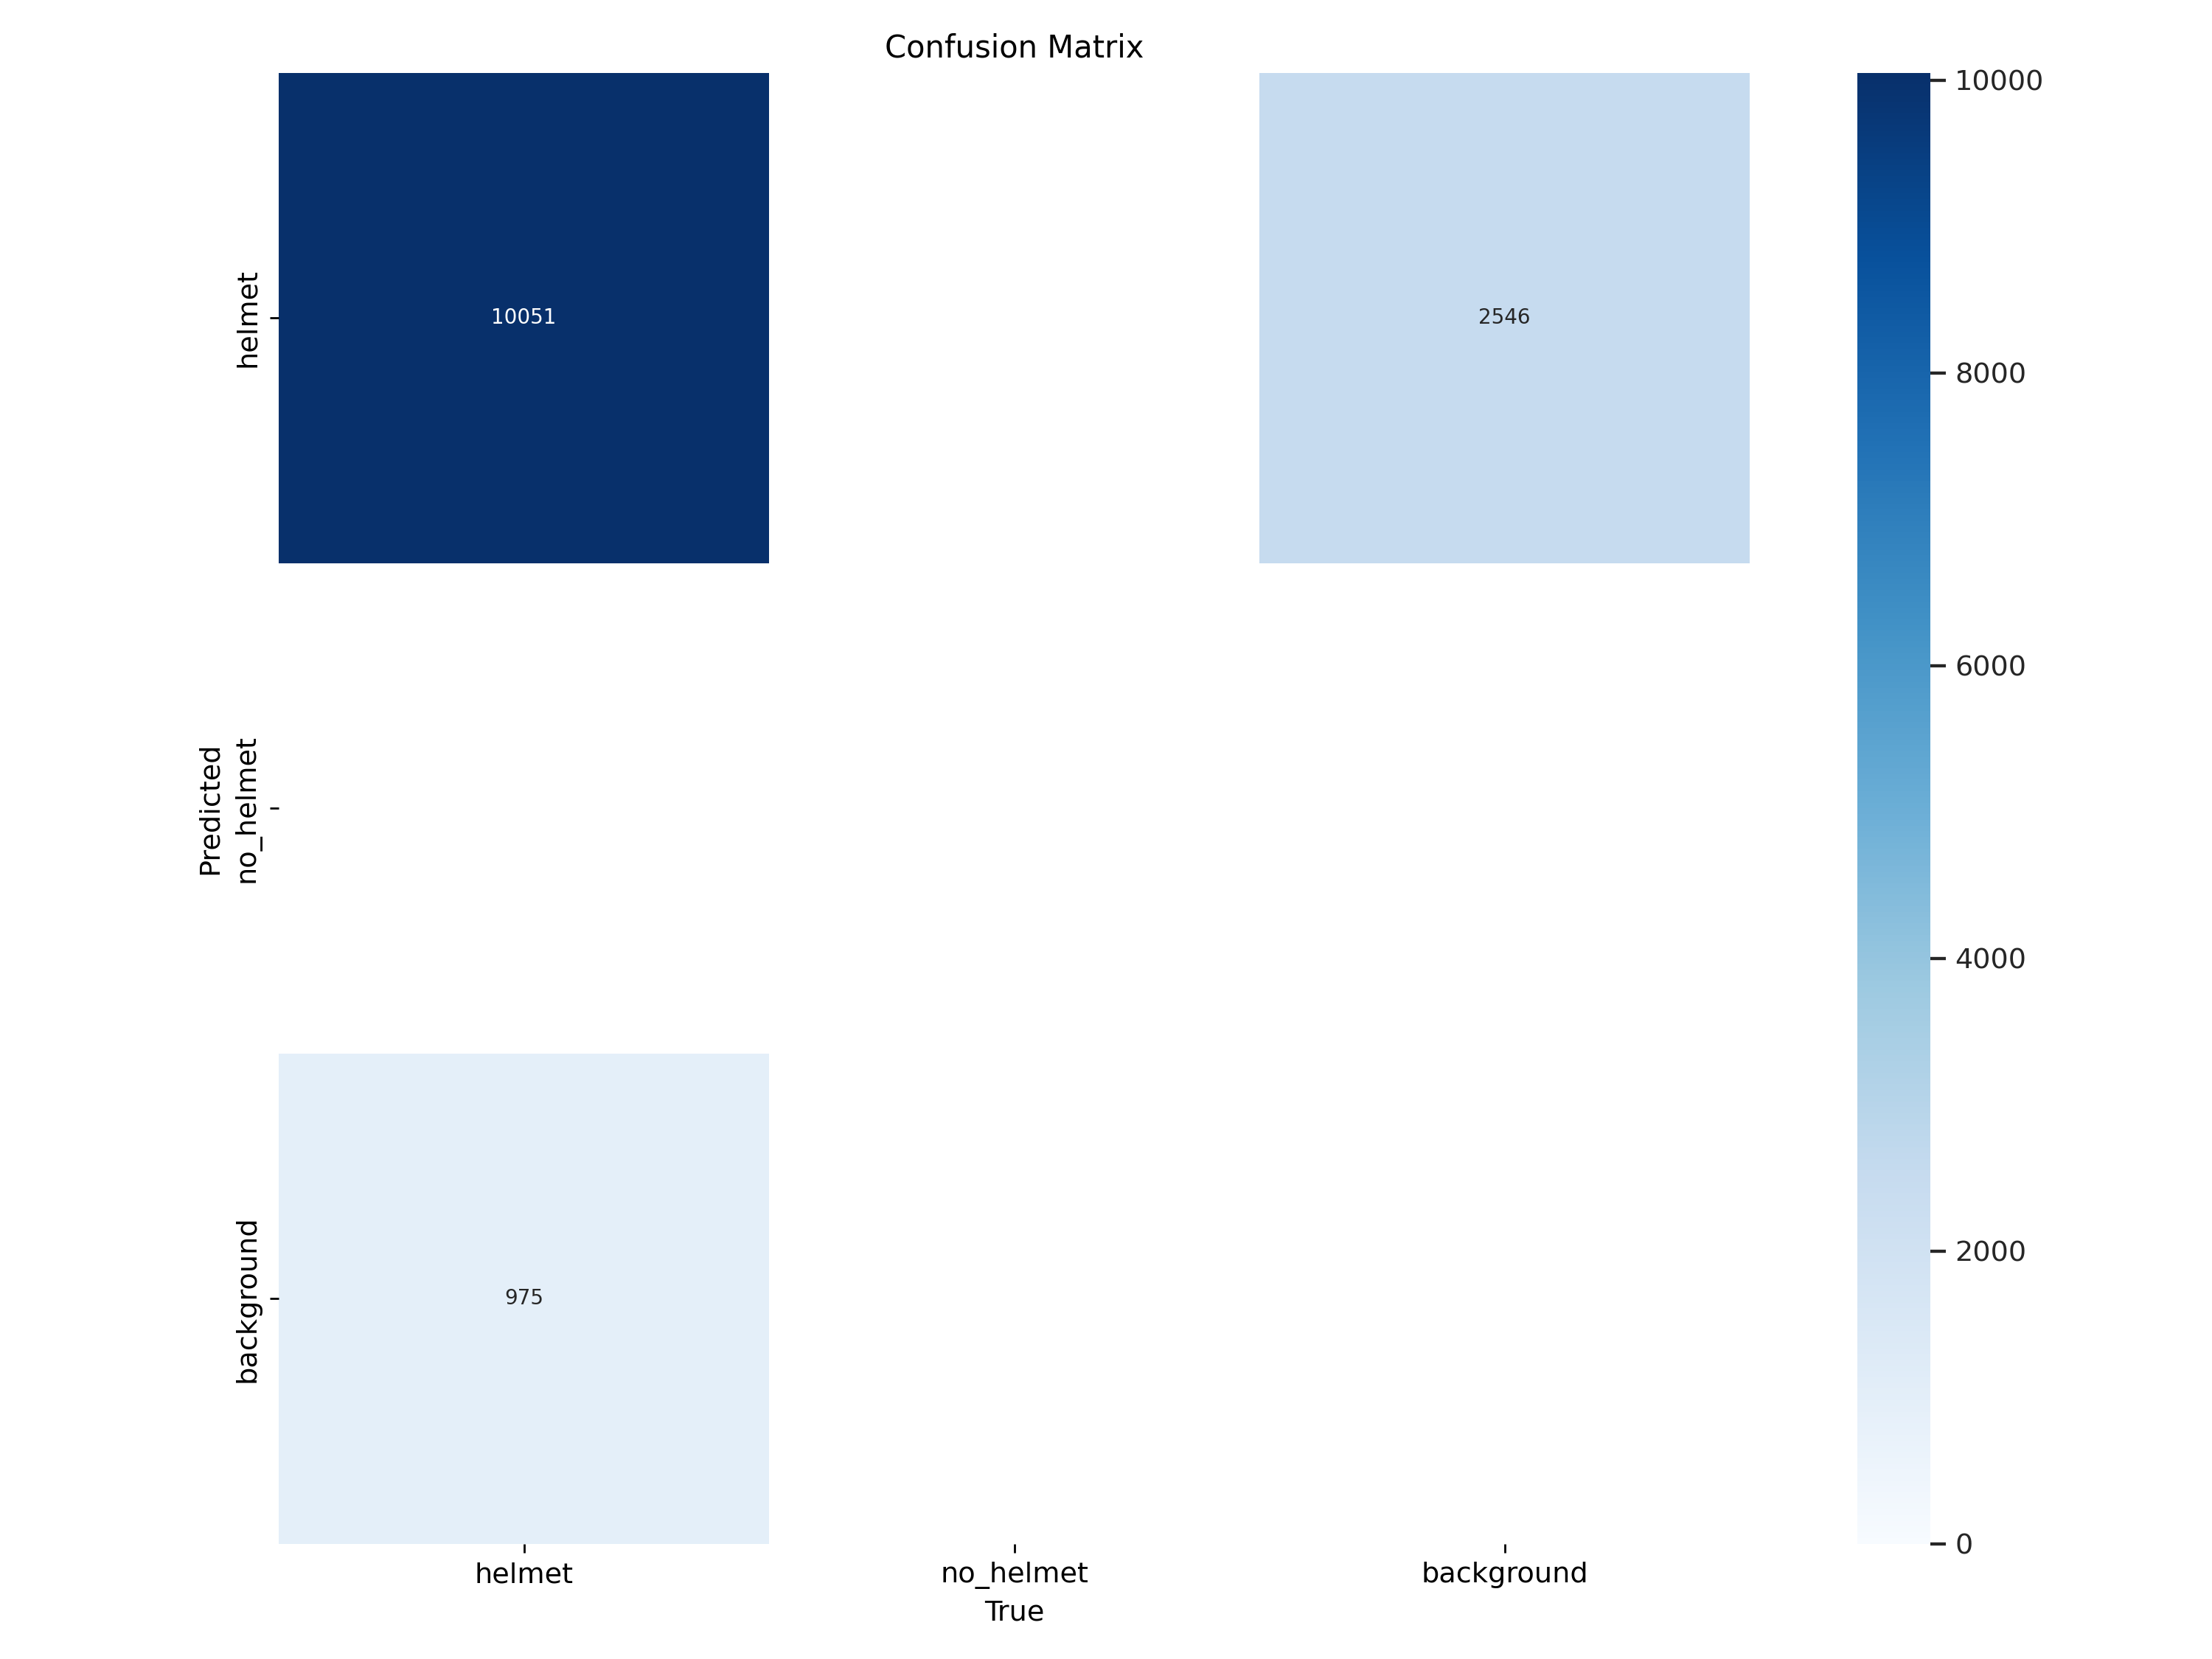


Results Plot:


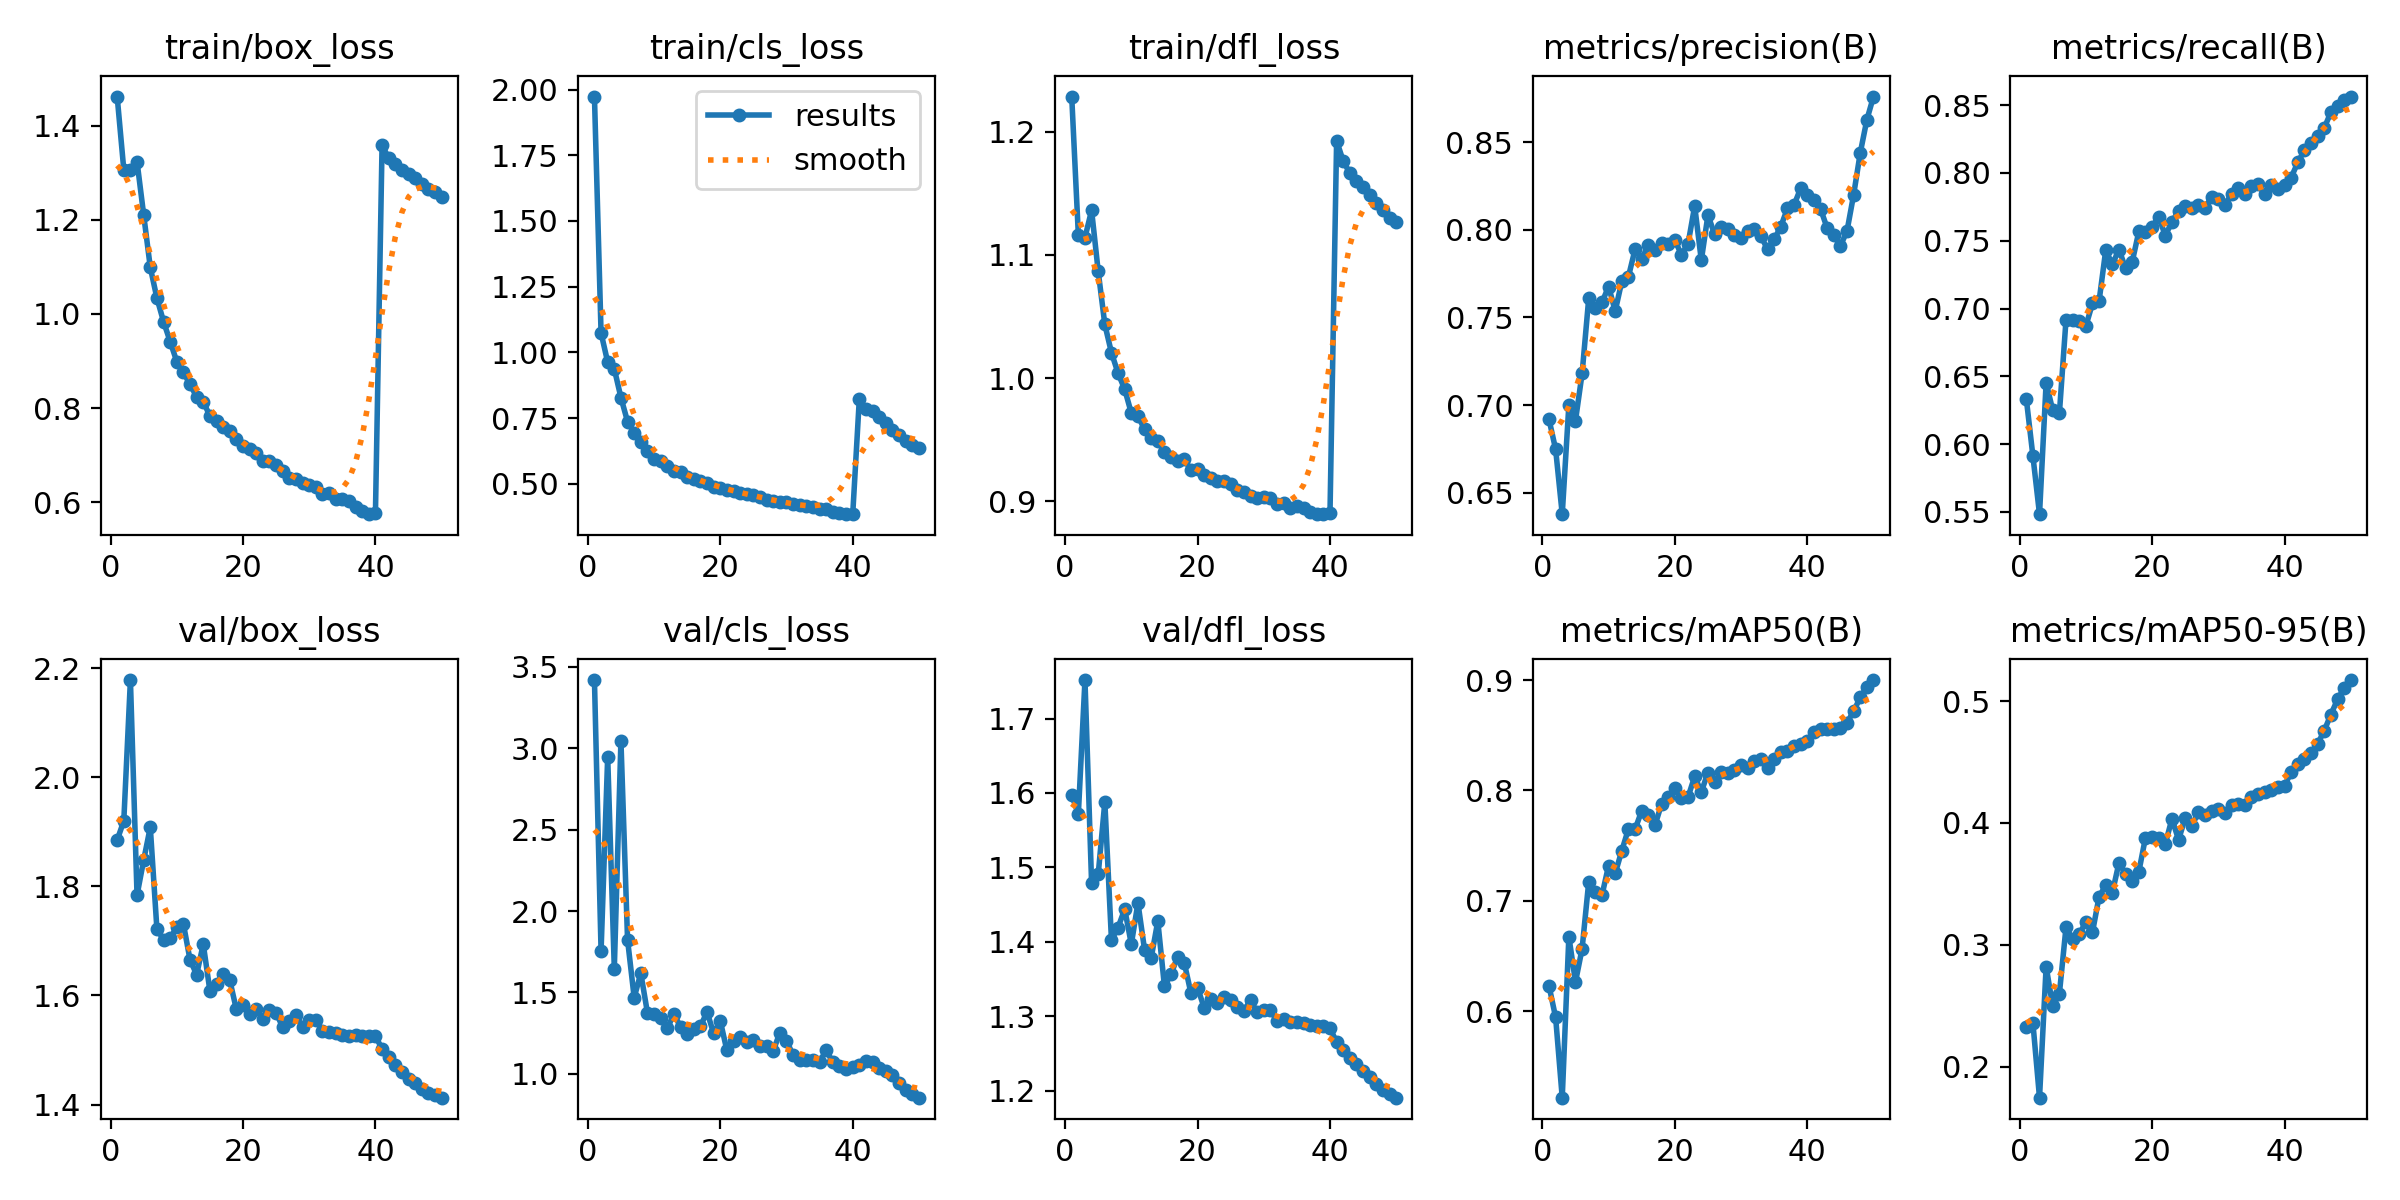


Validation Batch 0 Labels:


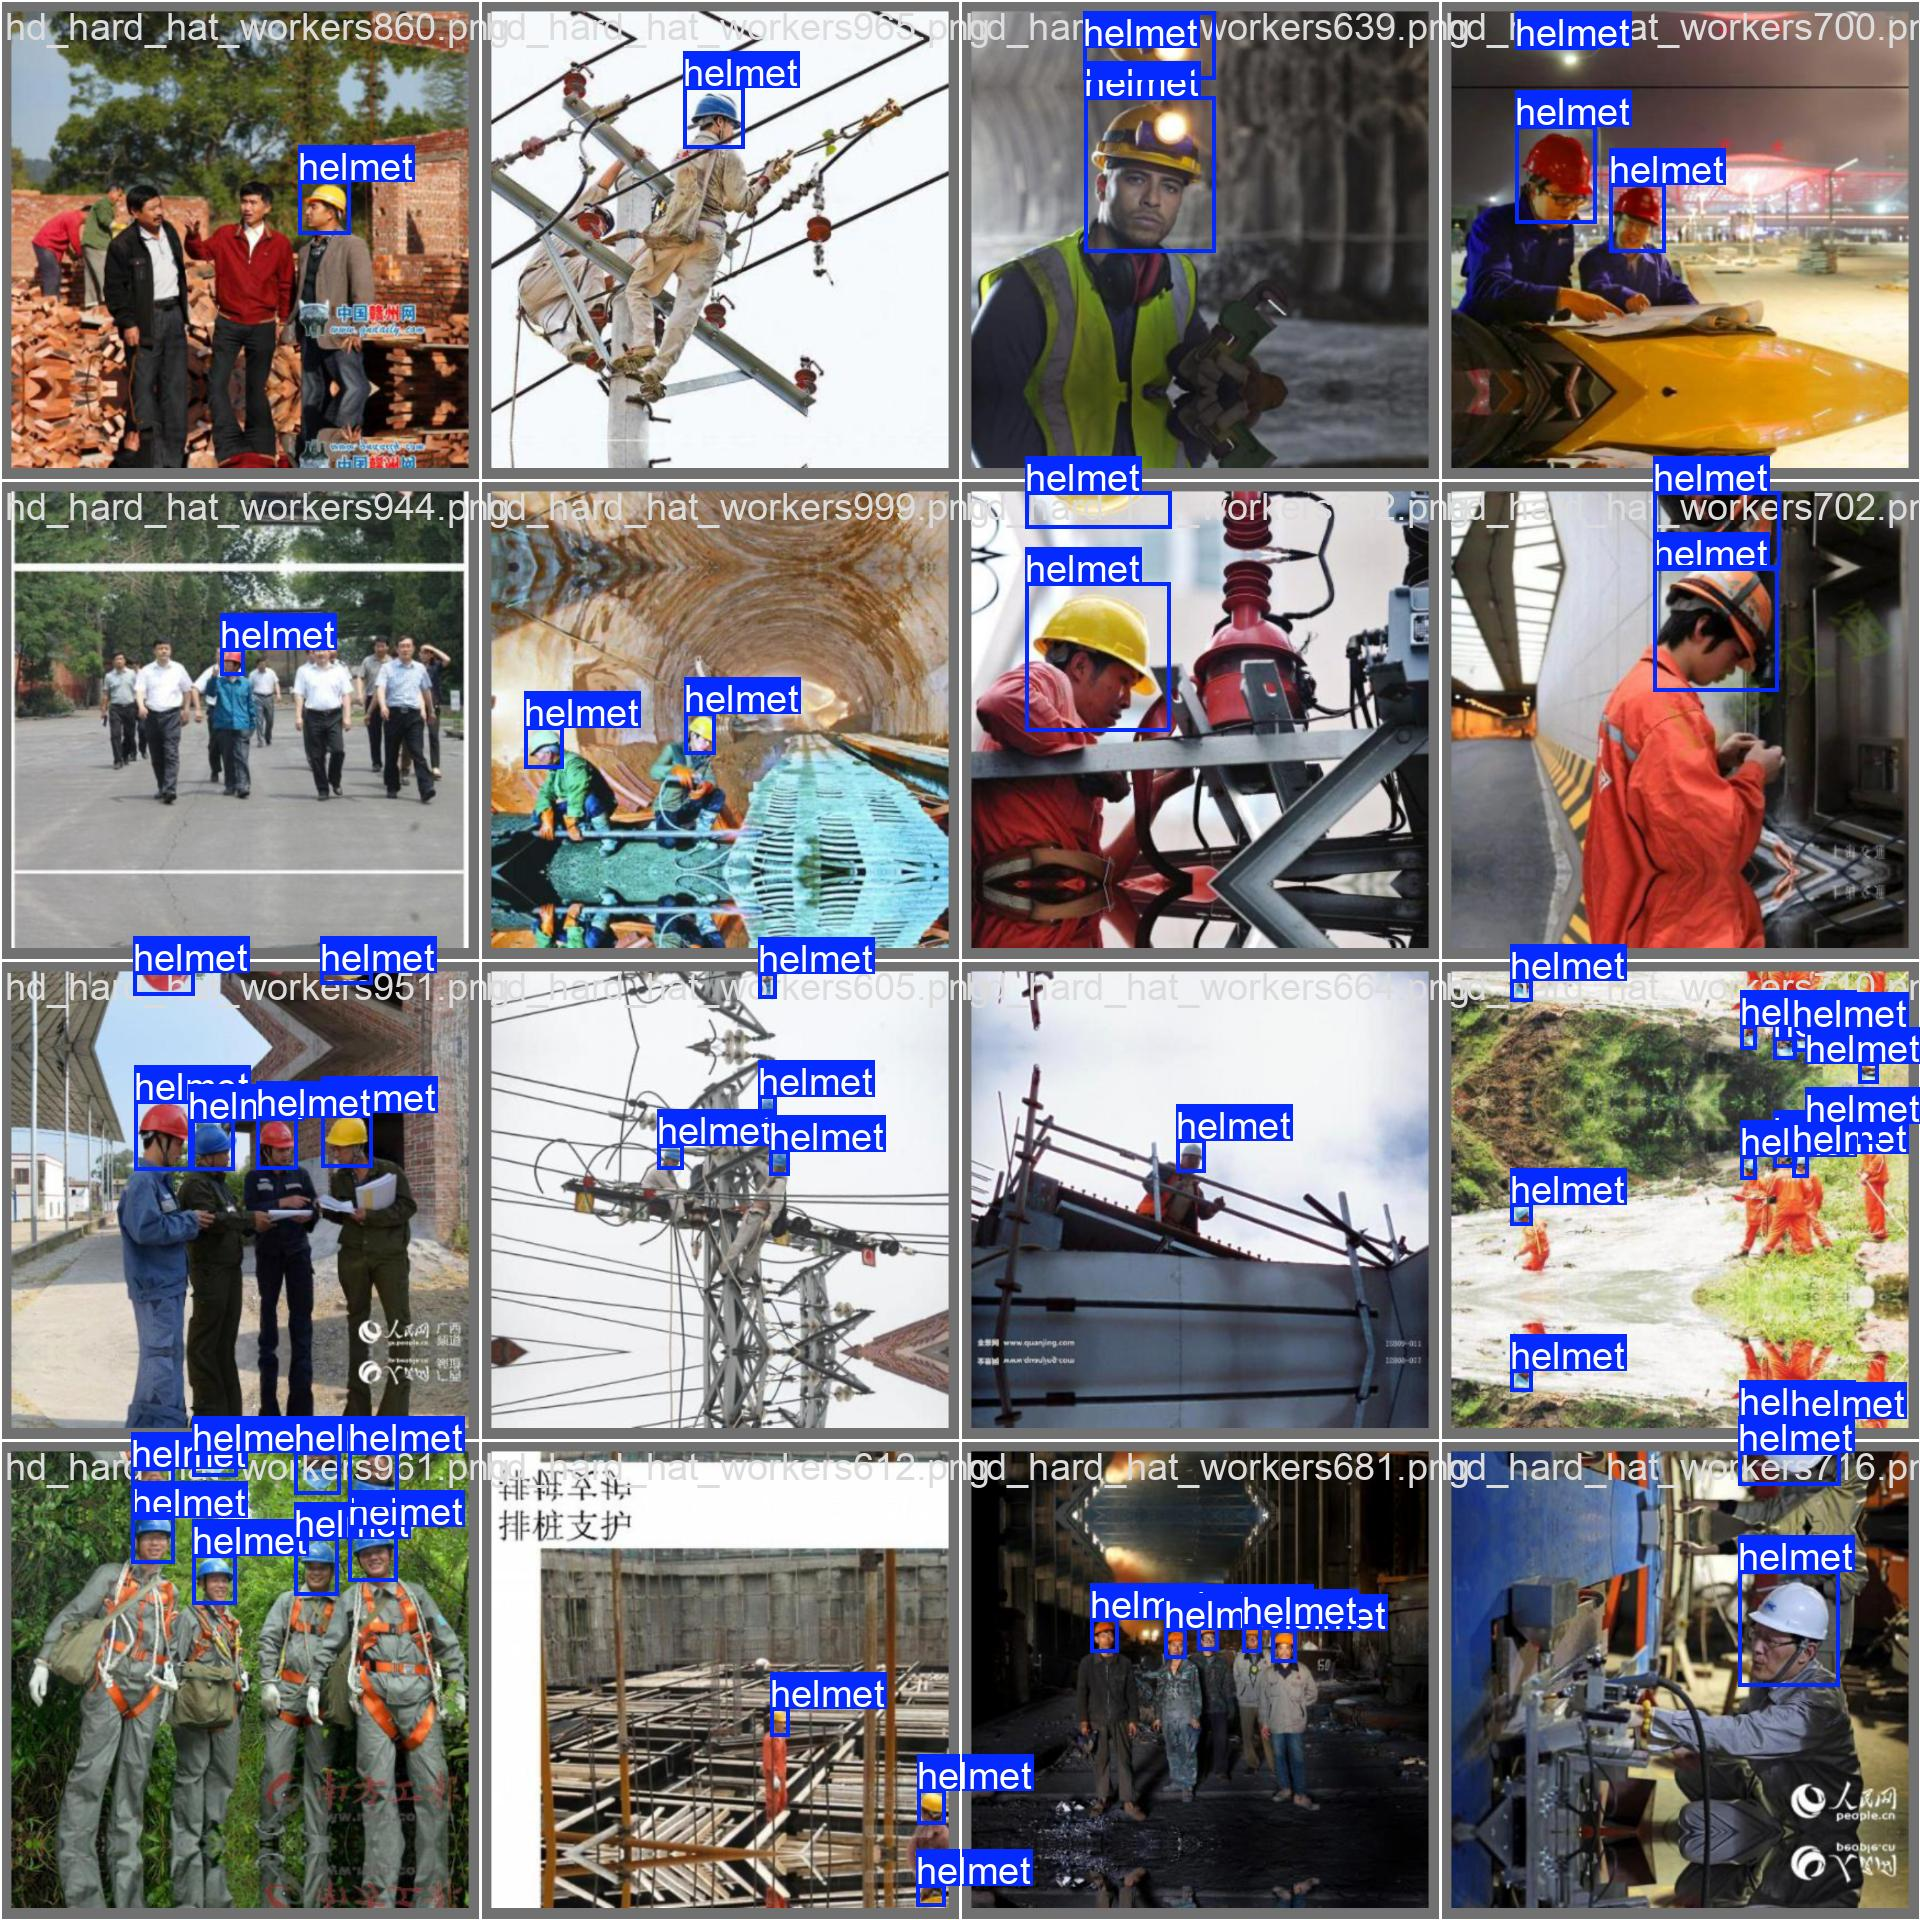


Validation Batch 0 Predictions:


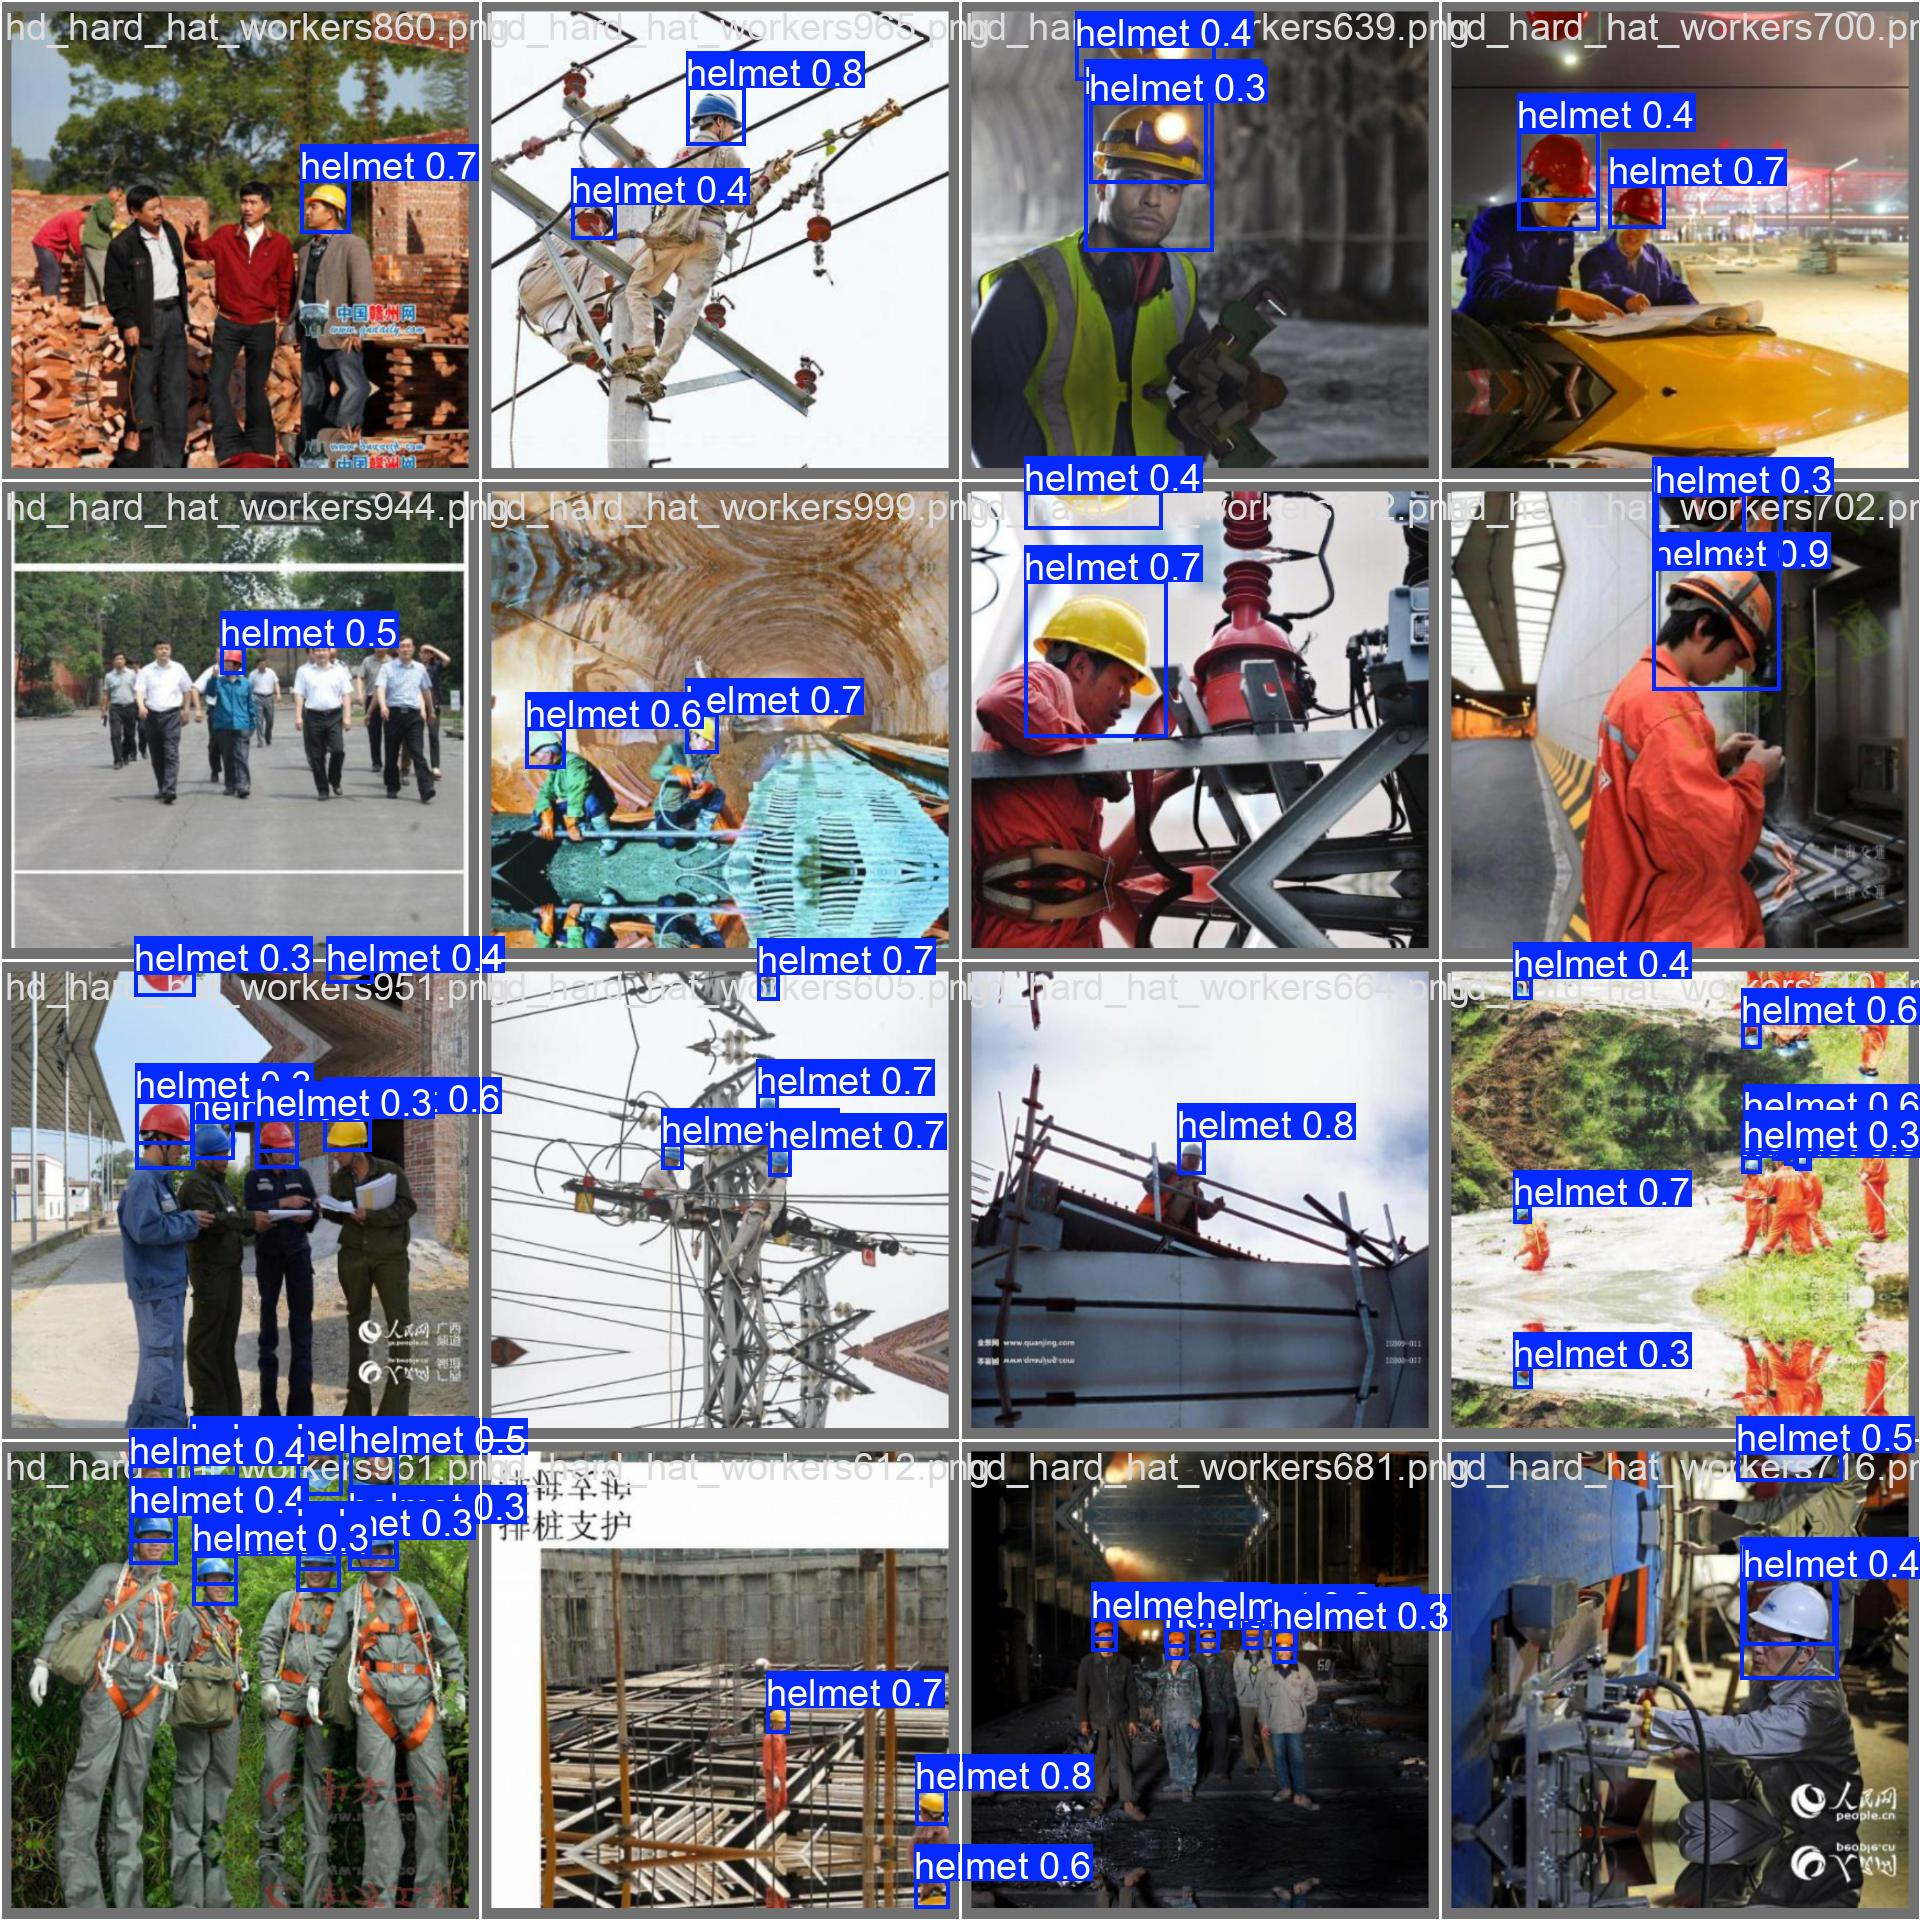

In [18]:
# Display paths to important results files (plots)
if TRAINING_SUCCESS and results_dir:
    print("Displaying training results plots:")

    confusion_matrix_path = os.path.join(results_dir, 'confusion_matrix.png')
    results_plot_path = os.path.join(results_dir, 'results.png')
    val_labels_path = os.path.join(results_dir, 'val_batch0_labels.jpg')
    val_pred_path = os.path.join(results_dir, 'val_batch0_pred.jpg')

    if os.path.exists(confusion_matrix_path):
        print("\nConfusion Matrix:")
        display(Image(filename=confusion_matrix_path))
    else:
        print(f"Confusion matrix not found at: {confusion_matrix_path}")

    if os.path.exists(results_plot_path):
        print("\nResults Plot:")
        display(Image(filename=results_plot_path))
    else:
        print(f"Results plot not found at: {results_plot_path}")

    if os.path.exists(val_labels_path):
        print("\nValidation Batch 0 Labels:")
        display(Image(filename=val_labels_path))
    else:
        print(f"Validation labels image not found at: {val_labels_path}")

    if os.path.exists(val_pred_path):
        print("\nValidation Batch 0 Predictions:")
        display(Image(filename=val_pred_path))
    else:
        print(f"Validation predictions image not found at: {val_pred_path}")
elif not TRAINING_SUCCESS:
    print("Training did not complete successfully. Cannot display results plots.")
else:
    print("Results directory not found. Cannot display results plots.")

## Section 7: Load Trained Model and Run Inference

Load the best weights from the completed training run and prepare for inference.

In [19]:
# --- Section 7: Load Trained Model ---

model_trained = None # Initialize variable

# Only proceed if training seemed to complete and results were saved
if TRAINING_SUCCESS and results_dir:
    # Path to the trained model weights
    TRAINED_MODEL_PATH = os.path.join(results_dir, 'weights/best.pt')

    # Check if the trained model file exists
    if not os.path.exists(TRAINED_MODEL_PATH):
        print(f"Error: Trained model not found at {TRAINED_MODEL_PATH}")
        print("Cannot proceed with inference.")
    else:
        # Load the trained model
        print(f"Loading trained model from {TRAINED_MODEL_PATH}")
        try:
            model_trained = YOLO(TRAINED_MODEL_PATH)
            print("Trained model loaded successfully.")
        except Exception as e:
            print(f"An error occurred during trained model loading: {e}")
            model_trained = None # Ensure it's None if loading failed
else:
    print(
        "Skipping trained model loading because training did not complete successfully "
        "or results directory is unknown."
    )

Loading trained model from runs/detect/helmet_train5/weights/best.pt
Trained model loaded successfully.


### Inference on an Image

Use the loaded trained model to run prediction on a sample image.

**Important:** You need to change the `IMAGE_TO_PREDICT` variable in the next cell to the path of an actual image file you want to test.

In [20]:
# --- Inference on an Image ---

# <<< CHANGE THIS TO YOUR IMAGE PATH >>>
IMAGE_TO_PREDICT = 'image.jpg'

if model_trained: # Check if the trained model was loaded successfully
    if not os.path.exists(IMAGE_TO_PREDICT):
        print(f"\nWarning: Test image not found at {IMAGE_TO_PREDICT}")
        print("Skipping image inference. "
              "Please edit the IMAGE_TO_PREDICT variable above with a valid path.")
    else:
        print(f"\nRunning inference on: {IMAGE_TO_PREDICT}")
        try:
            # Run inference
            # Specify device='mps' for inference too, if desired
            predict_results = model_trained.predict(
                source=IMAGE_TO_PREDICT,
                save=True,      # Save image with bounding boxes
                conf=0.5,       # Optional: set confidence threshold
                # device='mps',
                device='cuda',
            )
            # Results are saved in `runs/detect/predict*` directory relative to notebook
            print("Prediction results saved.")

            # Optional: Display the saved prediction image
            # Find the latest prediction directory
            predict_save_dir = predict_results[0].save_dir
            img_base_name = os.path.basename(IMAGE_TO_PREDICT)
            predicted_image_path = os.path.join(predict_save_dir, img_base_name)

            if os.path.exists(predicted_image_path):
                print("\nDisplaying Prediction Result:")
                display(Image(filename=predicted_image_path))
            else:
                 print(f"Could not find saved prediction image at {predicted_image_path}")

            # Optional: Process results further if needed
            # for r in predict_results:
            #     print("Boxes detected:")
            #     print(r.boxes.data)
        except Exception as e:
            print(f"An error occurred during inference: {e}")
elif TRAINING_SUCCESS:
     print("Skipping inference because the trained model failed to load.")
else:
    print("Skipping inference because training did not complete successfully.")


Skipping image inference. Please edit the IMAGE_TO_PREDICT variable above with a valid path.
